# Visualisering av luftkvalitetsmålinger og datakvalitet (Nilu API)

In [2]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/niluAPI_clean_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

verdi_kolonne = ['Verdi_NO2', 'Verdi_O3', 'Verdi_SO2']
dekningsgrad_kolonner = ['Dekningsgrad_NO2', 'Dekningsgrad_O3', 'Dekningsgrad_SO2']
tittel = ['Verdi NO2 over tid', 'Verdi O3 over tid', 'Verdi SO2 over tid']


sys.path.insert(0, '../src/')
from niluAPI.data_niluAPI import plot_air_quality
plot_air_quality(df, verdi_kolonne, dekningsgrad_kolonner, tittel, tidskolonne="Dato")

Visualiseringen av luftkvalitetsdata viser hvordan luftforurensning utvikler seg over tid. På x-aksen er datoene, og på y-aksen ser vi verdiene for NO2, O3 og SO2. Dette gjør at vi kan spore trender og identifisere perioder med høy forurensning. Fargekodingen gir rask informasjon om datakvaliteten: røde punkter markerer interpolerte eller usikre data, gule punkter indikerer dekningsgrad under 90 %, og grønne punkter viser pålitelige data med dekningsgrad ≥ 90 %. Denne visualiseringen gir både et tydelig innblikk i luftkvaliteten og en vurdering av datakvaliteten.

# Visualisering av klimaanalyse (Frost API)

Korrelasjonskoeffisient (r): 0.090
P-verdi: 0.000


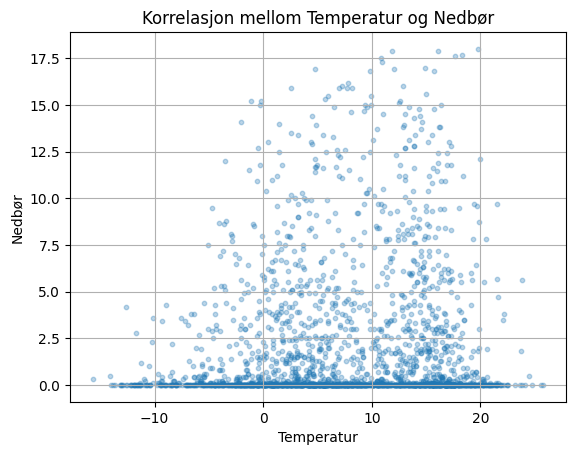

In [8]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/frostAPI_clean_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

x_var = 'Temperatur' 
y_var = 'Nedbør'

sys.path.insert(0, '../src/')
from frostAPI.data_frostAPI import analyse_correlation
analyse_correlation(data, x_var, y_var)


Korrelasjonskoeffisienten (r = 0.090) viser en svært svak positiv sammenheng mellom variablene. P-verdien (0.000) indikerer at sammenhengen er statistisk signifikant, altså lite sannsynlig at den er tilfeldig. Dette betyr at det finnes en svak, men signifikant sammenheng mellom temperatur og nedbør. Økt temperatur henger svakt sammen med økt nedbør.

For å illustrere denne sammenhengen benyttes et scatter plot, ettersom det effektivt visualiserer forholdet mellom to kontinuerlige variabler.

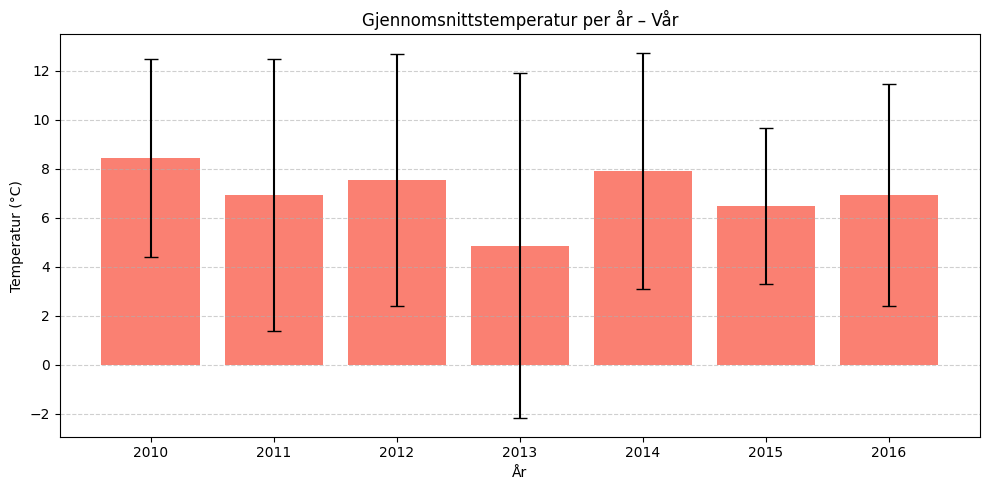

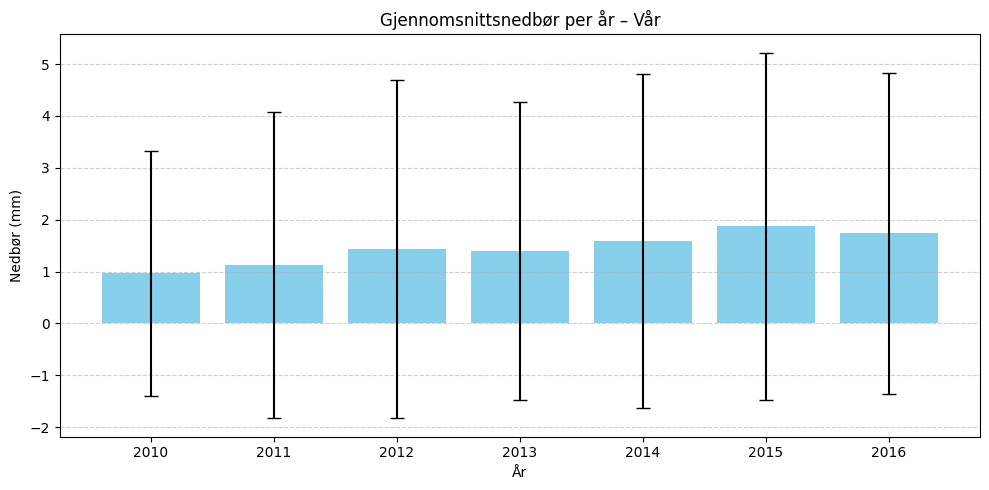

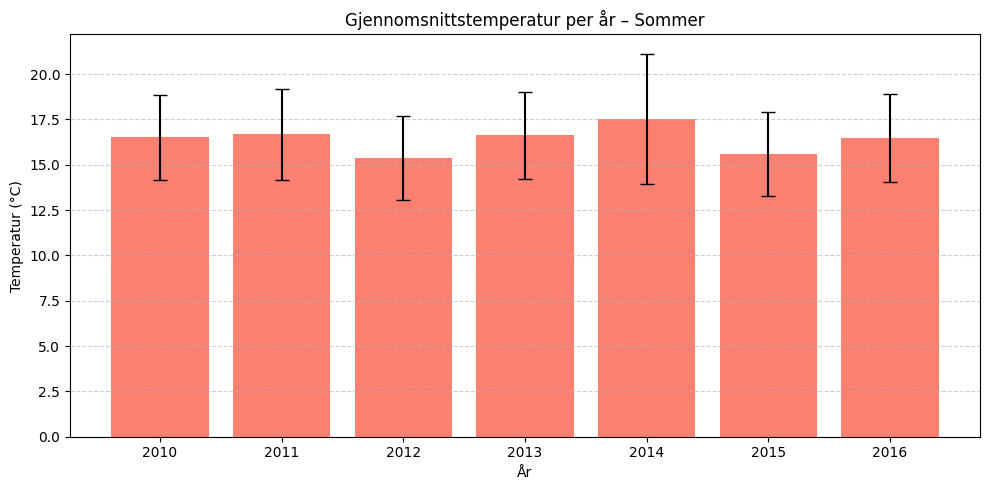

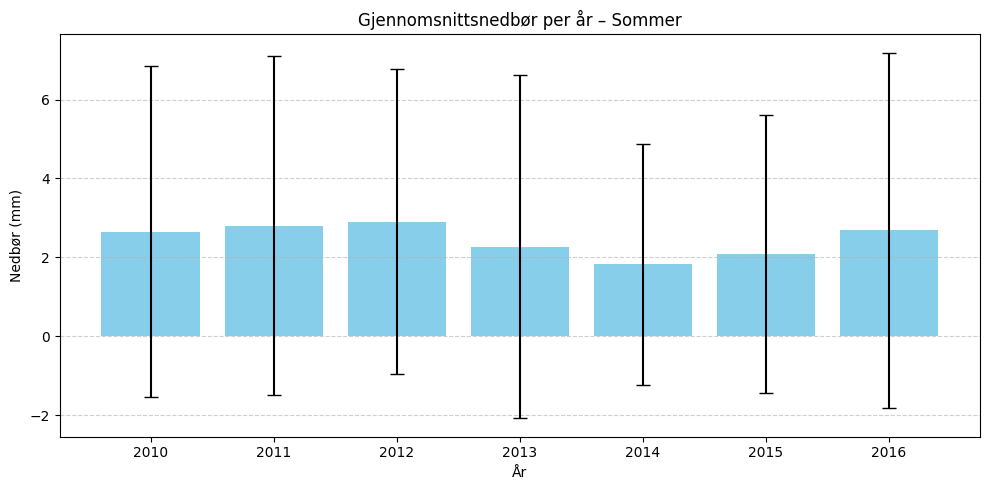

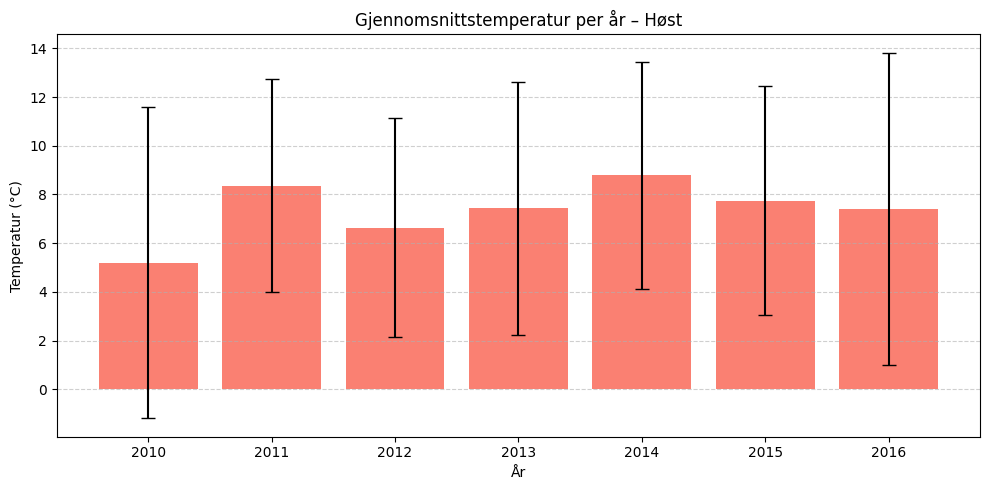

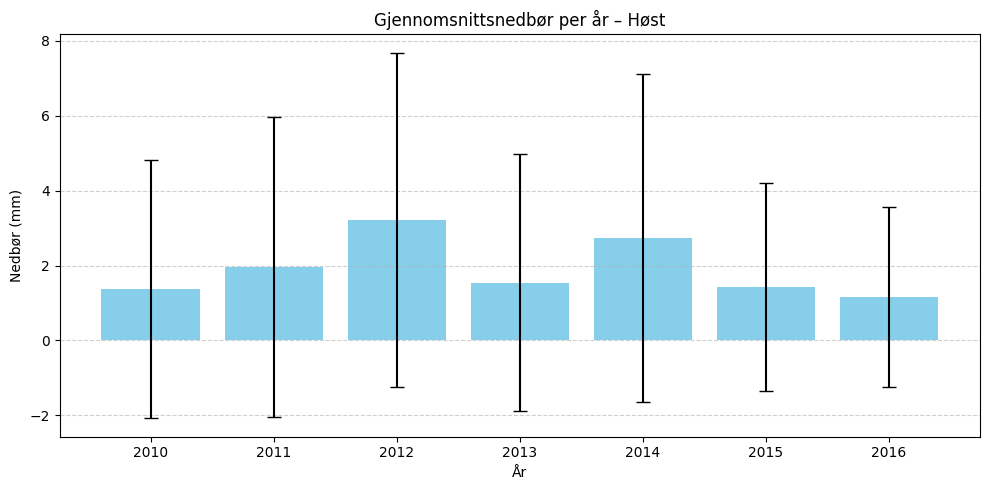

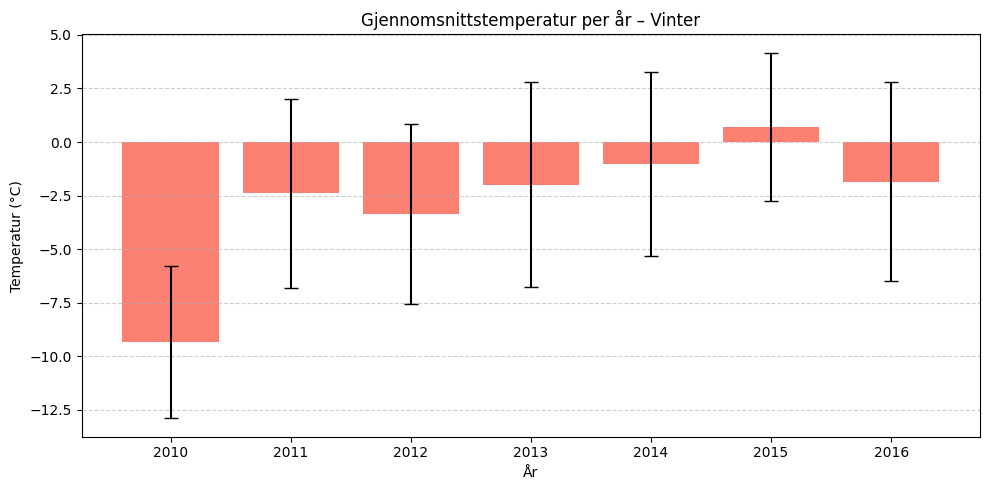

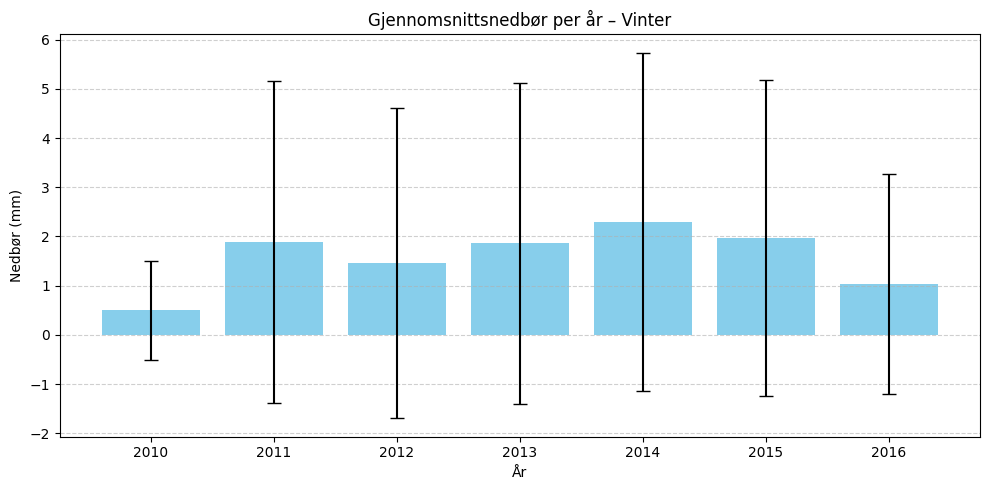

In [1]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/frostAPI_clean_data.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)

sys.path.insert(0, '../src/')
from frostAPI.data_frostAPI import calculate_and_plot_seasonal_bars
calculate_and_plot_seasonal_bars(df)

Grafene over viser utviklingen i gjennomsnittlig temperatur og nedbør per sesong per år, basert på dtata fra Frost API. 

Søylediagrammer er valgt som visualiseringsform fordi de gir en tydelig fremstilling av endringer over tid og gjør det enkelt å sammenligne verdier mellom sesonger og år. Videre er standardavvik inkludert som feilstolper i diagrammene. Hensikten med dette er å vise graden av spredning i observasjonene, og dermed indikere hvor stabilt eller variabelt værforholdene har vært innenfor hver sesong. 

## Visualisering av luftkvalitet og temperatur

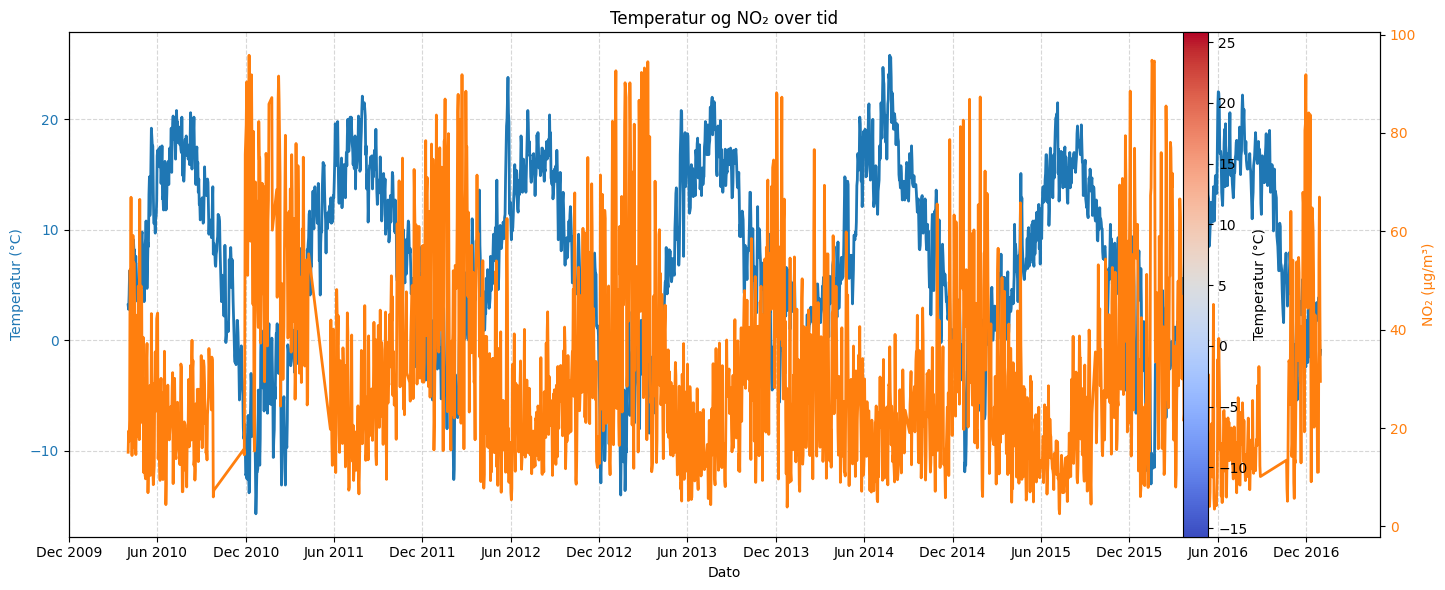

In [1]:
import json
import sys
import pandas as pd

# Lese JSON-filen
with open("../data/clean_data/frostAPI_clean_data.json", "r", encoding="utf-8") as file:
    data_frost = json.load(file)

with open("../data/clean_data/niluAPI_clean_data.json", "r", encoding="utf-8") as file:
    data_nilu= json.load(file)

# Gjør om listene til DataFrames 
frost_df = pd.DataFrame(data_frost)
nilu_df = pd.DataFrame(data_nilu)

# Datoene er i begge er datetime-objekter
frost_df['Dato'] = pd.to_datetime(frost_df['Dato'])
nilu_df['Dato'] = pd.to_datetime(nilu_df['Dato'])

# Slå sammen på 'Dato'
df = pd.merge(frost_df, nilu_df, on='Dato', how='inner') 

sys.path.insert(0, '../src/')
from frostAPI.data_frostAPI import plot_no2_with_temperature
plot_no2_with_temperature(df)


Visualiseringen av temperatur og NO₂-nivåer over tid gir en klar indikasjon på hvordan  temperatur kan påvirke luftkvaliteten. Det er tydelig at temperaturen har en betydelig innvirkning på nivåene av NO₂, og at sammenhengen mellom disse variablene er preget av sesongvariasjoner.

I de kalde vintermånedene, når temperaturene er lavere, ser vi ofte høyere NO₂-nivåer. Dette kan skyldes at lav temperatur fører til dårligere luftutveksling, som igjen resulterer i høyere konsentrasjoner av forurensning. I motsetning til dette viser diagrammet at høyere temperaturer om sommeren kan bidra til lavere NO₂-nivåer, delvis fordi økte temperaturer fremmer bedre luftutveksling. 